In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('data/Mental Illness Survey 1.csv')
cols_to_check = ['Unnamed: 28', 'Unnamed: 29']
data.head()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am currently employed at least part-time,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months.,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,I have one of the following issues in addition to my illness,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Age,Gender,Household Income,Region,Device Type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Response,Response,Response,Response,Open-Ended Response,Response,Response,Response,Response,Response,Open-Ended Response,Open-Ended Response,Response,Response,Open-Ended Response,Response,Response,Open-Ended Response,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Response,Response,Response,Response,Response
1,6.630447e+09,168522804.0,01/15/2018 03:45:16 AM,01/15/2018 03:48:24 AM,NaN,NaN,NaN,NaN,06f645d7ea5af372d50a62bd17,No,High School or GED,No,No,0,No,No,Yes,No,Yes,24,35,Yes,Yes,0,No,No,0,Lack of concentration,Anxiety,Depression,Obsessive thinking,NaN,Panic attacks,NaN,NaN,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
2,6.630410e+09,168522804.0,01/15/2018 03:17:52 AM,01/15/2018 03:18:57 AM,NaN,NaN,NaN,NaN,abca2776418ff1fe24bb85e21f,Yes,Some Phd,Yes,No,0,Yes,No,Yes,No,No,1,22,No,Yes,0,No,No,0,Lack of concentration,Anxiety,Depression,NaN,NaN,Panic attacks,NaN,Tiredness,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
3,6.630402e+09,168522804.0,01/15/2018 03:10:28 AM,01/15/2018 03:12:49 AM,NaN,NaN,NaN,NaN,3800088cf4e55278b38bbe67f3,No,Completed Undergraduate,Yes,No,0,Yes,No,Yes,No,No,0,100,No,Yes,0,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
4,6.630335e+09,168522804.0,01/15/2018 02:11:16 AM,01/15/2018 02:12:33 AM,NaN,NaN,NaN,NaN,84585803a3cec189f89fe43d44,No,Some Undergraduate,Yes,No,NaN,No,No,Yes,Yes,Yes,11,0,Yes,Yes,0,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop


# Cleaning and Pre-processing Data
There is a lot to take care of with this dataset! Nulls, dtype conversions, label encoding, one-hot encoding...

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 40 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Respondent ID                                                 334 non-null    float64
 1   Collector ID                                                  334 non-null    float64
 2   Start Date                                                    334 non-null    object 
 3   End Date                                                      334 non-null    object 
 4   IP Address                                                    0 non-null      float64
 5   Email Address                                                 0 non-null      float64
 6   First Name                                                    0 non-null      float64
 7   Last Name                                                     0 non-nul

We see that row 1 is not data but a secondary header. The only relevant data it appears to contain is the col names for symptoms (Depression, Anxiety, Obssesive Thoughts...).

So drop the first row and rename those columns.

In [4]:
data.drop(axis=0, index=0, inplace=True)
data.rename(columns={'Unnamed: 28':'Anxiety',
                     'Unnamed: 29':'Depression',
                     'Unnamed: 30':'Obsessive_thinking',
                     'Unnamed: 31':'Mood_swings',
                     'Unnamed: 32':'Panic_attacks',
                     'Unnamed: 33':'Compulsive_behavior',
                     'Unnamed: 34':'Tiredness',
                     data.columns[27] : 'Lack of concentration',
                     data.columns[19] : 'Total gaps in resume in months', # this col name was causing problems so need to rename
                    }, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 1 to 334
Data columns (total 40 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Respondent ID                                                 334 non-null    float64
 1   Collector ID                                                  334 non-null    float64
 2   Start Date                                                    334 non-null    object 
 3   End Date                                                      334 non-null    object 
 4   IP Address                                                    0 non-null      float64
 5   Email Address                                                 0 non-null      float64
 6   First Name                                                    0 non-null      float64
 7   Last Name                                                     0 non-nul

In [6]:
print("Sum of nulls per col:")
for col in data.columns:
    if data[col].isnull().sum() > 0:
        print(f'{col} : {data[col].isnull().sum()}')

Sum of nulls per col:
IP Address : 334
Email Address : 334
First Name : 334
Last Name : 334
How many days were you hospitalized for your mental illness : 37
Lack of concentration : 283
Anxiety : 234
Depression : 248
Obsessive_thinking : 292
Mood_swings : 296
Panic_attacks : 285
Compulsive_behavior : 305
Tiredness : 234
Region : 2


In [7]:
# col index 27 has 283 nulls and is "I have one of the following issues in addition to my illness"
# so add it to the list of cols to be renamed so can use as a symptom feature
data.iloc[:, 27].value_counts()

Lack of concentration    51
Name: Lack of concentration, dtype: int64

In [8]:
data['Collector ID'].unique()

array([1.68522804e+08])

After reviewing nulls, let's drop cols: 
IP Address
Email Address
First Name
Last name

Also drop:<br>
Collector ID - there is only 1 value here<br>
Custom Data 1 - we don't know what this represents

Rename "I have one of the following issues in addition to my illness" to "Lack of concentration"


In [9]:
cols_to_drop = ['IP Address', 'Email Address', 'First Name', 'Last Name', 'Collector ID', 'Custom Data 1']
data.drop(cols_to_drop, axis=1, inplace=True)

In [10]:
cols_to_fill = ['Anxiety',
                'Depression',
                'Obsessive_thinking',
                'Mood_swings',
                'Panic_attacks',
                'Compulsive_behavior',
                'Tiredness',
                'Lack of concentration']

#data_clean = data[cols_to_fill].fillna(0, axis=1)
#data_clean = data.copy()

In [11]:
for col in cols_to_fill:
    data[col].fillna(0, inplace=True)
    data[col] = data[col].apply(lambda x : 0 if x == 0 else 1)

In [12]:
data.head()

,Respondent ID,Start Date,End Date,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am currently employed at least part-time,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
1,6.630447e+09,01/15/2018 03:45:16 AM,01/15/2018 03:48:24 AM,No,High School or GED,No,No,0,No,No,Yes,No,Yes,24,35,Yes,Yes,0,No,No,0,1,1,1,1,0,1,0,0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
2,6.630410e+09,01/15/2018 03:17:52 AM,01/15/2018 03:18:57 AM,Yes,Some Phd,Yes,No,0,Yes,No,Yes,No,No,1,22,No,Yes,0,No,No,0,1,1,1,0,0,1,0,1,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
3,6.630402e+09,01/15/2018 03:10:28 AM,01/15/2018 03:12:49 AM,No,Completed Undergraduate,Yes,No,0,Yes,No,Yes,No,No,0,100,No,Yes,0,No,No,0,0,0,0,0,0,0,0,0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
4,6.630335e+09,01/15/2018 02:11:16 AM,01/15/2018 02:12:33 AM,No,Some Undergraduate,Yes,No,NaN,No,No,Yes,Yes,Yes,11,0,Yes,Yes,0,No,No,0,0,0,0,0,0,0,0,0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
5,6.630290e+09,01/15/2018 01:24:12 AM,01/15/2018 01:26:34 AM,Yes,Completed Undergraduate,Yes,Yes,35,Yes,Yes,Yes,No,Yes,33,32,No,Yes,30,No,No,4,1,1,1,1,1,1,1,1,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


A lot of columns have "yes"/"no" answers so let's convert those to binary labels

In [13]:
from sklearn.preprocessing import LabelBinarizer
binary_cols = ['I identify as having a mental illness', 
               'I have my own computer separate from a smart phone',
               'I have been hospitalized before for my mental illness', 
               'I am currently employed at least part-time',
               'I am legally disabled',
               'I have my regular access to the internet',
               'I live with my parents',
               'I have a gap in my resume',
               'I am unemployed',
               'I read outside of work and school',
               'I receive food stamps',
               'I am on section 8 housing'
              ]
le = LabelBinarizer()
for col in binary_cols:
    data[col] = le.fit_transform(data[col])

In [14]:
data.head()

,Respondent ID,Start Date,End Date,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am currently employed at least part-time,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
1,6.630447e+09,01/15/2018 03:45:16 AM,01/15/2018 03:48:24 AM,0,High School or GED,0,0,0,0,0,1,0,1,24,35,1,1,0,0,0,0,1,1,1,1,0,1,0,0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
2,6.630410e+09,01/15/2018 03:17:52 AM,01/15/2018 03:18:57 AM,1,Some Phd,1,0,0,1,0,1,0,0,1,22,0,1,0,0,0,0,1,1,1,0,0,1,0,1,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
3,6.630402e+09,01/15/2018 03:10:28 AM,01/15/2018 03:12:49 AM,0,Completed Undergraduate,1,0,0,1,0,1,0,0,0,100,0,1,0,0,0,0,0,0,0,0,0,0,0,0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
4,6.630335e+09,01/15/2018 02:11:16 AM,01/15/2018 02:12:33 AM,0,Some Undergraduate,1,0,NaN,0,0,1,1,1,11,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
5,6.630290e+09,01/15/2018 01:24:12 AM,01/15/2018 01:26:34 AM,1,Completed Undergraduate,1,1,35,1,1,1,0,1,33,32,0,1,30,0,0,4,1,1,1,1,1,1,1,1,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


Now let's deal with the nulls in the remaining columns "How many days were you hospitalized for your mental illness" and 'Region'

In [15]:
# If impute with the mean, what will it be?
x = data['How many days were you hospitalized for your mental illness']
x.dropna()
x2 = pd.to_numeric(x)
x2.mean()

3.276094276094276

In [16]:
# let's check this against the similar yes/no question.
data['I have been hospitalized before for my mental illness'][data['How many days were you hospitalized for your mental illness'].isna()]

4      0
11     0
16     0
20     0
28     0
30     0
32     0
36     0
46     0
64     0
91     0
98     0
110    0
112    0
118    0
127    0
163    0
176    0
183    0
186    0
199    0
203    0
206    0
208    0
226    0
232    0
234    0
250    0
264    0
266    1
271    0
282    0
283    0
293    0
298    0
315    0
330    0
Name: I have been hospitalized before for my mental illness, dtype: int64

All but one person said yes to hospitalization and didn't report the days (i.e. null for days)
- drop this record and fill 0 for the rest

In [17]:
data.drop(index=266, axis=0)
data['How many days were you hospitalized for your mental illness'].fillna(0, inplace=True)

In [18]:
# only 2 regions with nulls - drop these since it is so few
data.dropna(subset=['Region'], axis=0, inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1 to 334
Data columns (total 34 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Respondent ID                                                 332 non-null    float64
 1   Start Date                                                    332 non-null    object 
 2   End Date                                                      332 non-null    object 
 3   I identify as having a mental illness                         332 non-null    int64  
 4   Education                                                     332 non-null    object 
 5   I have my own computer separate from a smart phone            332 non-null    int64  
 6   I have been hospitalized before for my mental illness         332 non-null    int64  
 7   How many days were you hospitalized for your mental illness   332 non-n

And let's convert appropriate cols to integers

In [23]:
# This won't work for some reason... pretty sure but with pandas
data.astype({'How many days were you hospitalized for your mental illness':'int32',
             'Total gaps in resume in months': 'int64',
             'Annual income (including any social welfare programs) in USD': 'int32',
             'Annual income from social welfare programs': 'int32',
             'How many times were you hospitalized for your mental illness': 'int32'
            })

,Respondent ID,Start Date,End Date,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am currently employed at least part-time,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
1,6.630447e+09,01/15/2018 03:45:16 AM,01/15/2018 03:48:24 AM,0,High School or GED,0,0,0,0,0,1,0,1,24,35,1,1,0,0,0,0,1,1,1,1,0,1,0,0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
2,6.630410e+09,01/15/2018 03:17:52 AM,01/15/2018 03:18:57 AM,1,Some Phd,1,0,0,1,0,1,0,0,1,22,0,1,0,0,0,0,1,1,1,0,0,1,0,1,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
3,6.630402e+09,01/15/2018 03:10:28 AM,01/15/2018 03:12:49 AM,0,Completed Undergraduate,1,0,0,1,0,1,0,0,0,100,0,1,0,0,0,0,0,0,0,0,0,0,0,0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
4,6.630335e+09,01/15/2018 02:11:16 AM,01/15/2018 02:12:33 AM,0,Some Undergraduate,1,0,0,0,0,1,1,1,11,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
5,6.630290e+09,01/15/2018 01:24:12 AM,01/15/2018 01:26:34 AM,1,Completed Undergraduate,1,1,35,1,1,1,0,1,33,32,0,1,30,0,0,4,1,1,1,1,1,1,1,1,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,6.629053e+09,01/14/2018 03:34:38 AM,01/14/2018 03:36:44 AM,0,High School or GED,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,45-60,Female,Prefer not to answer,Mountain,Android Phone / Tablet
331,6.629052e+09,01/14/2018 03:34:38 AM,01/14/2018 03:36:09 AM,0,Some Undergraduate,1,0,0,1,0,1,1,0,0,62,0,1,0,0,0,0,0,0,0,0,0,0,0,0,18-29,Male,"$50,000-$74,999",Pacific,Windows Desktop / Laptop
332,6.629051e+09,01/14/2018 03:27:20 AM,01/14/2018 03:33:01 AM,0,Some Undergraduate,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,> 60,Female,"$10,000-$24,999",West North Central,Windows Desktop / Laptop
333,6.629051e+09,01/14/2018 03:29:31 AM,01/14/2018 03:32:45 AM,1,Some Undergraduate,0,1,1,0,1,1,1,1,30,12,1,1,12,1,0,3,1,1,1,1,1,1,1,1,18-29,Female,"$0-$9,999",West South Central,Android Phone / Tablet


In [21]:
data['How many days were you hospitalized for your mental illness'] = pd.to_numeric(data['How many days were you hospitalized for your mental illness'])
data['Total gaps in resume in months'] = pd.to_numeric(data['Total gaps in resume in months'])
data['Annual income (including any social welfare programs) in USD'] = pd.to_numeric(data['Annual income (including any social welfare programs) in USD'])
data['Annual income from social welfare programs'] = pd.to_numeric(data['Annual income from social welfare programs'])
data['How many times were you hospitalized for your mental illness'] = pd.to_numeric(data['How many times were you hospitalized for your mental illness'])

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1 to 334
Data columns (total 34 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Respondent ID                                                 332 non-null    float64
 1   Start Date                                                    332 non-null    object 
 2   End Date                                                      332 non-null    object 
 3   I identify as having a mental illness                         332 non-null    int64  
 4   Education                                                     332 non-null    object 
 5   I have my own computer separate from a smart phone            332 non-null    int64  
 6   I have been hospitalized before for my mental illness         332 non-null    int64  
 7   How many days were you hospitalized for your mental illness   332 non-n

Convert dates to datetime dtypes

In [25]:
data['Total gaps in resume in months'].mean()

8.548192771084338

In [26]:
data['Start Date'] = pd.to_datetime(data['Start Date'])
data['End Date'] = pd.to_datetime(data['End Date'])

In [29]:
data['I am unemployed']

1      1
2      0
3      0
4      1
5      0
      ..
330    1
331    0
332    0
333    1
334    0
Name: I am unemployed, Length: 332, dtype: int64

In [39]:
data.columns

Index(['Respondent ID', 'Start Date', 'End Date',
       'I identify as having a mental illness', 'Education',
       'I have my own computer separate from a smart phone',
       'I have been hospitalized before for my mental illness',
       'How many days were you hospitalized for your mental illness',
       'I am currently employed at least part-time', 'I am legally disabled',
       'I have my regular access to the internet', 'I live with my parents',
       'I have a gap in my resume', 'Total gaps in resume in months',
       'Annual income (including any social welfare programs) in USD',
       'I am unemployed', 'I read outside of work and school',
       'Annual income from social welfare programs', 'I receive food stamps',
       'I am on section 8 housing',
       'How many times were you hospitalized for your mental illness',
       'Lack of concentration', 'Anxiety', 'Depression', 'Obsessive_thinking',
       'Mood_swings', 'Panic_attacks', 'Compulsive_behavior', 'Tirednes

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

rf_class = RandomForestClassifier()

features = ['I identify as having a mental illness', 
            'I have my own computer separate from a smart phone',
            'I have been hospitalized before for my mental illness',
            'I am legally disabled',
            'I have my regular access to the internet',
            'I live with my parents',
            'I have a gap in my resume', 
            'Total gaps in resume in months',
            'Annual income (including any social welfare programs) in USD',
            'I read outside of work and school',
            'Annual income from social welfare programs', 
            'I receive food stamps',
            'I am on section 8 housing',
            'How many times were you hospitalized for your mental illness',
            'Lack of concentration', 
            'Anxiety', 
            'Depression', 
            'Obsessive_thinking',
            'Mood_swings', 
            'Panic_attacks', 
            'Compulsive_behavior', 
            'Tiredness'
           ]

y = data['I am unemployed']
numeric_features = [feat for feat in features if data[feat].dtype in ['int64', 'float64']]
X = data[numeric_features]

In [136]:
numeric_features

['I identify as having a mental illness',
 'I have my own computer separate from a smart phone',
 'I have been hospitalized before for my mental illness',
 'I am legally disabled',
 'I have my regular access to the internet',
 'I live with my parents',
 'I have a gap in my resume',
 'Total gaps in resume in months',
 'Annual income (including any social welfare programs) in USD',
 'I read outside of work and school',
 'Annual income from social welfare programs',
 'I receive food stamps',
 'I am on section 8 housing',
 'How many times were you hospitalized for your mental illness',
 'Lack of concentration',
 'Anxiety',
 'Depression',
 'Obsessive_thinking',
 'Mood_swings',
 'Panic_attacks',
 'Compulsive_behavior',
 'Tiredness']

# Basic Model - Numeric Features Only
## Modeling WITHOUT EDA, One-Hot Encoding, Class Balancing, Feature Selectivity , or Feature Engineering

In [137]:
# classes are pretty imbalanced
y.value_counts()

0    246
1     86
Name: I am unemployed, dtype: int64

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=17, stratify=y)
rf_class.fit(X_train, y_train)

RandomForestClassifier()

In [139]:
rf_class.score(X_test, y_test)

0.746268656716418

In [140]:
y_pred = rf_class.predict(X_test)

In [141]:
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import plot_confusion_matrix
recall_score(y_test, y_pred)

0.23529411764705882

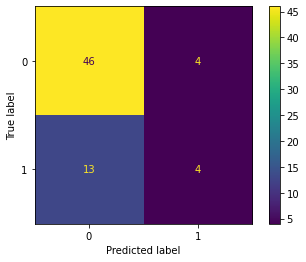

In [142]:
plot_confusion_matrix(rf_class, X_test, y_test)

In [143]:
rf_class.feature_importances_

array([0.02144489, 0.03366042, 0.01201177, 0.05106876, 0.02454784,
       0.02767425, 0.0428416 , 0.13226198, 0.28449462, 0.02153397,
       0.05592161, 0.02831958, 0.00830909, 0.02931678, 0.023818  ,
       0.0443512 , 0.03139085, 0.01740652, 0.01719555, 0.04531284,
       0.00659935, 0.0405185 ])

In [144]:
rf_class.feature_importances_.sum()

1.0

In [145]:
f = pd.DataFrame(data=rf_class.feature_importances_, index=features)
f.sort_values(by=[0], ascending=False)

,0
Annual income (including any social welfare programs) in USD,0.284495
Total gaps in resume in months,0.132262
Annual income from social welfare programs,0.055922
I am legally disabled,0.051069
Panic_attacks,0.045313
Anxiety,0.044351
I have a gap in my resume,0.042842
Tiredness,0.040519
I have my own computer separate from a smart phone,0.033660
Depression,0.031391


### Add Cross Validataion
#### Since we have imbalanced classes, stratify the folds using StratifiedKFold

In [146]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import make_pipeline

In [147]:
pipe = make_pipeline(RandomForestClassifier())
skf = StratifiedKFold(n_splits=5, random_state=11, shuffle=True)
scores = cross_val_score(pipe, X, y, cv=skf, scoring='accuracy')
print(f'Accuracy Scores: {scores}')
print(f'\tMean:{scores.mean()}')
scores = cross_val_score(pipe, X, y, cv=skf, scoring='recall')
print(f'Recall Scores: {scores}')
print(f'\tMean:{scores.mean()}')
scores = cross_val_score(pipe, X, y, cv=skf, scoring='f1')
print(f'F1 Scores: {scores}')
print(f'\tMean:{scores.mean()}')

Accuracy Scores: [0.71641791 0.76119403 0.78787879 0.78787879 0.6969697 ]
	Mean:0.7500678426051561
Recall Scores: [0.33333333 0.47058824 0.35294118 0.35294118 0.47058824]
	Mean:0.39607843137254906
F1 Scores: [0.38709677 0.5        0.33333333 0.5        0.44444444]
	Mean:0.4329749103942652


# Finish Preprocessing
## One-Hot Encoding
### Get Dummies approach

In [127]:
data.drop('Device Type', axis=1, inplace=True)

In [183]:
dummy_data = pd.get_dummies(data)
dummy_data

,Respondent ID,Start Date,End Date,I identify as having a mental illness,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am currently employed at least part-time,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Education_Completed Masters,Education_Completed Phd,Education_Completed Undergraduate,Education_High School or GED,Education_Some Phd,Education_Some Undergraduate,Education_Some highschool,Education_Some Masters,Age_18-29,Age_30-44,Age_45-60,Age_> 60,Gender_Female,Gender_Male,"Household Income_$0-$9,999","Household Income_$10,000-$24,999","Household Income_$100,000-$124,999","Household Income_$125,000-$149,999","Household Income_$150,000-$174,999","Household Income_$175,000-$199,999","Household Income_$200,000+","Household Income_$25,000-$49,999","Household Income_$50,000-$74,999","Household Income_$75,000-$99,999",Household Income_Prefer not to answer,Region_East North Central,Region_East South Central,Region_Middle Atlantic,Region_Mountain,Region_New England,Region_Pacific,Region_South Atlantic,Region_West North Central,Region_West South Central
1,6.630447e+09,2018-01-15 03:45:16,2018-01-15 03:48:24,0,0,0,0,0,0,1,0,1,24,35,1,1,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,6.630410e+09,2018-01-15 03:17:52,2018-01-15 03:18:57,1,1,0,0,1,0,1,0,0,1,22,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,6.630402e+09,2018-01-15 03:10:28,2018-01-15 03:12:49,0,1,0,0,1,0,1,0,0,0,100,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,6.630335e+09,2018-01-15 02:11:16,2018-01-15 02:12:33,0,1,0,0,0,0,1,1,1,11,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
5,6.630290e+09,2018-01-15 01:24:12,2018-01-15 01:26:34,1,1,1,35,1,1,1,0,1,33,32,0,1,30,0,0,4,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,6.629053e+09,2018-01-14 03:34:38,2018-01-14 03:36:44,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
331,6.629052e+09,2018-01-14 03:34:38,2018-01-14 03:36:09,0,1,0,0,1,0,1,1,0,0,62,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
332,6.629051e+09,2018-01-14 03:27:20,2018-01-14 03:33:01,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
333,6.629051e+09,2018-01-14 03:29:31,2018-01-14 03:32:45,1,0,1,1,0,1,1,1,1,30,12,1,1,12,1,0,3,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [165]:
cat_features = [col for col in data.columns if data[col].dtype == 'object']

In [166]:
cat_features

['Education', 'Age', 'Gender', 'Household Income', 'Region']

### SKLearn OneHotEncoder Approach

In [167]:
from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder(sparse=False)
oh_data = oh_encoder.fit_transform(data[cat_features])
oh_data.shape

(332, 34)

In [168]:
oh_encoder.categories_

[array(['Completed Masters', 'Completed Phd', 'Completed Undergraduate',
        'High School or GED', 'Some Phd', 'Some Undergraduate',
        'Some highschool', 'Some\xa0Masters'], dtype=object),
 array(['18-29', '30-44', '45-60', '> 60'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['$0-$9,999', '$10,000-$24,999', '$100,000-$124,999',
        '$125,000-$149,999', '$150,000-$174,999', '$175,000-$199,999',
        '$200,000+', '$25,000-$49,999', '$50,000-$74,999',
        '$75,000-$99,999', 'Prefer not to answer'], dtype=object),
 array(['East North Central', 'East South Central', 'Middle Atlantic',
        'Mountain', 'New England', 'Pacific', 'South Atlantic',
        'West North Central', 'West South Central'], dtype=object)]

In [181]:
# create column headers for onehot encoded data
col_headers = []
for i, cat in enumerate(oh_encoder.categories_):
    for label in cat:
        col_headers.append(cat_features[i] + '_' + label)
        
col_headers

['Education_Completed Masters',
 'Education_Completed Phd',
 'Education_Completed Undergraduate',
 'Education_High School or GED',
 'Education_Some Phd',
 'Education_Some Undergraduate',
 'Education_Some highschool',
 'Education_Some\xa0Masters',
 'Age_18-29',
 'Age_30-44',
 'Age_45-60',
 'Age_> 60',
 'Gender_Female',
 'Gender_Male',
 'Household Income_$0-$9,999',
 'Household Income_$10,000-$24,999',
 'Household Income_$100,000-$124,999',
 'Household Income_$125,000-$149,999',
 'Household Income_$150,000-$174,999',
 'Household Income_$175,000-$199,999',
 'Household Income_$200,000+',
 'Household Income_$25,000-$49,999',
 'Household Income_$50,000-$74,999',
 'Household Income_$75,000-$99,999',
 'Household Income_Prefer not to answer',
 'Region_East North Central',
 'Region_East South Central',
 'Region_Middle Atlantic',
 'Region_Mountain',
 'Region_New England',
 'Region_Pacific',
 'Region_South Atlantic',
 'Region_West North Central',
 'Region_West South Central']

In [197]:
# How do I join this back to the main dataframe? Need to create the column headers from the .categories_ somehow
oh_df = pd.DataFrame(data=oh_data, columns=col_headers)
oh_df

,Education_Completed Masters,Education_Completed Phd,Education_Completed Undergraduate,Education_High School or GED,Education_Some Phd,Education_Some Undergraduate,Education_Some highschool,Education_Some Masters,Age_18-29,Age_30-44,Age_45-60,Age_> 60,Gender_Female,Gender_Male,"Household Income_$0-$9,999","Household Income_$10,000-$24,999","Household Income_$100,000-$124,999","Household Income_$125,000-$149,999","Household Income_$150,000-$174,999","Household Income_$175,000-$199,999","Household Income_$200,000+","Household Income_$25,000-$49,999","Household Income_$50,000-$74,999","Household Income_$75,000-$99,999",Household Income_Prefer not to answer,Region_East North Central,Region_East South Central,Region_Middle Atlantic,Region_Mountain,Region_New England,Region_Pacific,Region_South Atlantic,Region_West North Central,Region_West South Central
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
328,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
329,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
330,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [198]:
data

,Respondent ID,Start Date,End Date,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am currently employed at least part-time,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Age,Gender,Household Income,Region
1,6.630447e+09,2018-01-15 03:45:16,2018-01-15 03:48:24,0,High School or GED,0,0,0,0,0,1,0,1,24,35,1,1,0,0,0,0,1,1,1,1,0,1,0,0,30-44,Male,"$25,000-$49,999",Mountain
2,6.630410e+09,2018-01-15 03:17:52,2018-01-15 03:18:57,1,Some Phd,1,0,0,1,0,1,0,0,1,22,0,1,0,0,0,0,1,1,1,0,0,1,0,1,18-29,Male,"$50,000-$74,999",East South Central
3,6.630402e+09,2018-01-15 03:10:28,2018-01-15 03:12:49,0,Completed Undergraduate,1,0,0,1,0,1,0,0,0,100,0,1,0,0,0,0,0,0,0,0,0,0,0,0,30-44,Male,"$150,000-$174,999",Pacific
4,6.630335e+09,2018-01-15 02:11:16,2018-01-15 02:12:33,0,Some Undergraduate,1,0,0,0,0,1,1,1,11,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,30-44,Male,"$25,000-$49,999",New England
5,6.630290e+09,2018-01-15 01:24:12,2018-01-15 01:26:34,1,Completed Undergraduate,1,1,35,1,1,1,0,1,33,32,0,1,30,0,0,4,1,1,1,1,1,1,1,1,30-44,Male,"$25,000-$49,999",East North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,6.629053e+09,2018-01-14 03:34:38,2018-01-14 03:36:44,0,High School or GED,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,45-60,Female,Prefer not to answer,Mountain
331,6.629052e+09,2018-01-14 03:34:38,2018-01-14 03:36:09,0,Some Undergraduate,1,0,0,1,0,1,1,0,0,62,0,1,0,0,0,0,0,0,0,0,0,0,0,0,18-29,Male,"$50,000-$74,999",Pacific
332,6.629051e+09,2018-01-14 03:27:20,2018-01-14 03:33:01,0,Some Undergraduate,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,> 60,Female,"$10,000-$24,999",West North Central
333,6.629051e+09,2018-01-14 03:29:31,2018-01-14 03:32:45,1,Some Undergraduate,0,1,1,0,1,1,1,1,30,12,1,1,12,1,0,3,1,1,1,1,1,1,1,1,18-29,Female,"$0-$9,999",West South Central


In [196]:
numeric_df = data[numeric_features]
numeric_df

,I identify as having a mental illness,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness
1,0,0,0,0,1,0,1,24,35,1,0,0,0,0,1,1,1,1,0,1,0,0
2,1,1,0,0,1,0,0,1,22,1,0,0,0,0,1,1,1,0,0,1,0,1
3,0,1,0,0,1,0,0,0,100,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,1,1,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,1,1,1,1,1,0,1,33,32,1,30,0,0,4,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
331,0,1,0,0,1,1,0,0,62,1,0,0,0,0,0,0,0,0,0,0,0,0
332,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0
333,1,0,1,1,1,1,1,30,12,1,12,1,0,3,1,1,1,1,1,1,1,1


# Looks like I need to reindex data

In [195]:
encoded_data = pd.concat([numeric_df, oh_df], axis=1)
encoded_data

,I identify as having a mental illness,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Education_Completed Masters,Education_Completed Phd,Education_Completed Undergraduate,Education_High School or GED,Education_Some Phd,Education_Some Undergraduate,Education_Some highschool,Education_Some Masters,Age_18-29,Age_30-44,Age_45-60,Age_> 60,Gender_Female,Gender_Male,"Household Income_$0-$9,999","Household Income_$10,000-$24,999","Household Income_$100,000-$124,999","Household Income_$125,000-$149,999","Household Income_$150,000-$174,999","Household Income_$175,000-$199,999","Household Income_$200,000+","Household Income_$25,000-$49,999","Household Income_$50,000-$74,999","Household Income_$75,000-$99,999",Household Income_Prefer not to answer,Region_East North Central,Region_East South Central,Region_Middle Atlantic,Region_Mountain,Region_New England,Region_Pacific,Region_South Atlantic,Region_West North Central,Region_West South Central
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,24.0,35.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,22.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,1.0,1.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
331,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,62.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
332,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333,1.0,0.0,1.0,1.0,1.0,1.0,1.0,30.0,12.0,1.0,12.0,1.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Basic EDA
more in depth approaches were done with Tableau

In [125]:
data.corr()

,Respondent ID,I identify as having a mental illness,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am currently employed at least part-time,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness
Respondent ID,1.000000,0.050044,0.028546,-0.048273,0.063760,0.057281,-0.023270,-0.050407,0.050485,-0.006932,-0.002998,-0.001547,-0.062074,0.034846,0.037069,-0.104431,-0.021609,0.011467,0.101387,0.041951,0.031026,0.013521,-0.071162,0.047318,-0.022649,0.005740
I identify as having a mental illness,0.050044,1.000000,-0.124569,0.438702,0.285140,-0.067346,0.236531,-0.079559,0.143277,0.248902,0.218366,-0.068940,0.133062,0.042875,0.067722,0.076414,0.015357,0.126401,0.365467,0.566523,0.711796,0.421187,0.438978,0.440670,0.399410,0.283889
I have my own computer separate from a smart phone,0.028546,-0.124569,1.000000,-0.125153,-0.132710,0.128090,-0.115848,0.217577,-0.129558,-0.181248,-0.166416,0.095642,-0.209314,0.009193,-0.022781,-0.226461,-0.007219,-0.016193,-0.038905,-0.204402,-0.105903,-0.127750,-0.176252,-0.097106,-0.074816,-0.011967
I have been hospitalized before for my mental illness,-0.048273,0.438702,-0.125153,1.000000,0.532061,-0.161094,0.315345,-0.063684,0.078631,0.223006,0.181463,-0.048637,0.185914,0.031978,0.179232,0.192774,0.113295,0.359713,0.155649,0.248491,0.339456,0.361236,0.247352,0.321223,0.267187,0.155472
How many days were you hospitalized for your mental illness,0.063760,0.285140,-0.132710,0.532061,1.000000,-0.127200,0.241055,-0.043228,0.145203,0.168487,0.106685,-0.028543,0.133615,-0.042622,0.089587,0.014959,0.035243,0.583717,-0.029019,0.175680,0.218938,0.203160,0.127055,0.256735,0.167490,0.002364
I am currently employed at least part-time,0.057281,-0.067346,0.128090,-0.161094,-0.127200,1.000000,-0.312336,0.144299,-0.155971,-0.147107,-0.243224,0.195576,-0.745363,0.003834,-0.013574,-0.233140,-0.124350,-0.043414,-0.048681,-0.127763,-0.096480,-0.108654,-0.119074,-0.170413,-0.039838,-0.038399
I am legally disabled,-0.023270,0.236531,-0.115848,0.315345,0.241055,-0.312336,1.000000,0.010397,0.143165,0.136546,0.196026,-0.165082,0.332086,0.021681,0.135654,0.235273,0.091391,0.073508,0.165583,0.111038,0.240171,0.176417,0.165155,0.145590,0.146810,0.094002
I have my regular access to the internet,-0.050407,-0.079559,0.217577,-0.063684,-0.043228,0.144299,0.010397,1.000000,-0.036268,-0.038772,-0.093683,0.102351,-0.106510,0.033982,-0.052687,-0.143039,0.028420,-0.036891,-0.007010,-0.048736,0.003994,-0.023395,-0.133133,0.035082,0.002754,0.054561
I live with my parents,0.050485,0.143277,-0.129558,0.078631,0.145203,-0.155971,0.143165,-0.036268,1.000000,0.182138,0.048226,-0.211494,0.169701,-0.153551,0.053068,0.101819,0.016248,0.118884,0.120088,0.172230,0.169701,0.158700,0.239759,0.128003,0.200899,-0.013306
I have a gap in my resume,-0.006932,0.248902,-0.181248,0.223006,0.168487,-0.147107,0.136546,-0.038772,0.182138,1.000000,0.647831,-0.168154,0.251231,0.025270,-0.006367,0.212447,0.013179,0.064844,0.162775,0.202492,0.251231,0.244279,0.167045,0.293350,0.243343,0.104050


One-hot encode multi-label features

In [ ]:
data.info()

In [ ]:
data['Household Income'].value_counts()